# Neural network

<h3>Task 1-3: creating the layer and network objects, with read- and evaluate methods</h3>

In [43]:
import numpy as np

class Layer:
    def __init__(self,weight_file,bias_file,cols=None,rows=None):
        self.weight_file = weight_file
        self.bias_file = bias_file
        try:
            self.weight = np.random.rand(rows,cols)
            self.bias = np.random.rand(rows)
        except TypeError:
            pass
    def read_data(self):
        self.weight = np.loadtxt(self.weight_file)
        self.bias = np.loadtxt(self.bias_file)

class Network:
    def __init__(self,layers):
        assert isinstance(layers[0],Layer)
        self.layers = layers
        self.activation = lambda x: np.maximum(0,x)

    def read_network_data(self):
        for layer in self.layers:
            layer.read_data()

    def evaluate(self,input):
        assert input.shape[0] == self.layers[0].weight.shape[1], f"Input size must match network input size: {self.layers[0].weight.shape[1]}"
        state_vector = input
        for layer in self.layers:
            state_vector = self.activation(layer.weight @ state_vector + layer.bias)
        return state_vector

<h3>Reading in the matrix data and initialising the network</h3>

NB! i am storing the data in a folder called "exercise6_data", modify the code to work on your machine

In [44]:
from pathlib import Path
import re

cwd = Path.cwd()
#we want to go to the parent folder, then into the 'exercise6_data' folder
data_dir = cwd.parent / 'data'
#data_dir = cwd /  /'exercise6_data'

weight_files = []; bias_files = []

# Defining the pattern of the files we want to read
W_pattern = re.compile(r'W_[0-9]+.txt')
b_pattern = re.compile(r'b_[0-9]+.txt')

for file in data_dir.glob('*.txt'):
    if W_pattern.match(file.name):
        weight_files.append(file)
    elif b_pattern.match(file.name):
        bias_files.append(file)

layers = [Layer(w,b) for w,b in zip(weight_files,bias_files)]

network = Network(layers)
network.read_network_data()

<h3>Task 4: code to read the image data (provided by Jonas)</h3>

In [50]:
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


def get_mnist():
    return datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

def return_image(image_index, mnist_dataset):
    # Get the image and its corresponding label
    image, label = mnist_dataset[image_index]

    # Now, you have the image as a PyTorch tensor.
    # You can access its data as a matrix using .detach().numpy()
    image_matrix = image[0].detach().numpy()  # Grayscale image, so we select the first channel (index 0)

    return image_matrix.reshape(image_matrix.size), image_matrix, label

def read_from_file(name=data_dir / "image_19961.txt"):
        x = np.zeros(28 * 28)
        with open(name) as file:
                for i, line in enumerate(file):
                    # split and convert values to floats
                    x[i * 28 : (i+1)*28] = [float(value) for value in line.strip().split()]



### Getting the data for a given image

In [53]:
# Choose an index to select one of the images
image_index = 19967
mnist_dataset = get_mnist()
x, image, label = return_image(image_index, mnist_dataset) # This here reads image {image_index} from the mnist dataset.
x_file = read_from_file() # In case you were not able to install torchvision, you can use this read_from_file function

print(f"Image {image_index} shows the number {label}")
#print(f"The pixels of this image (collected in a vector) are \n {x}")

Image 19967 shows the number 3


<h3>Task 5: Get the network response to image 19961 in the MNIST dataset</h3>

The value "x" in the above program, is the image vector; we pass this to the network's evaluation method to get the response.
We then divide by the maximum vector value to get make the other values in the vector, to represent the certainty relative to the max.

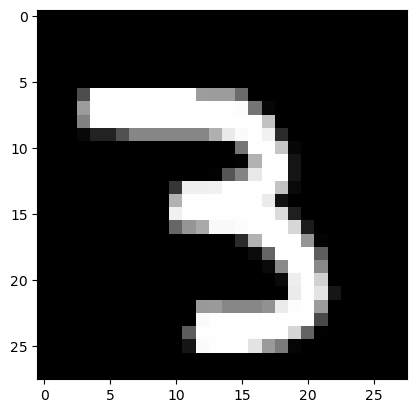

The response vector of the network is: 3


In [54]:
response_vector = network.evaluate(x)

plt.imshow(image, cmap='gray')
plt.show()

print(f"The response vector of the network is: {np.argmax(response_vector)}")
# for i in range(len(response_vector)):
#     print(f"y_{i} = {response_vector[i] / np.max(response_vector):.3f}")